In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('daily_csv.csv')

In [15]:
df

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [16]:
df.isnull()

,Date,Price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5948,False,False
5949,False,False
5950,False,False
5951,False,False


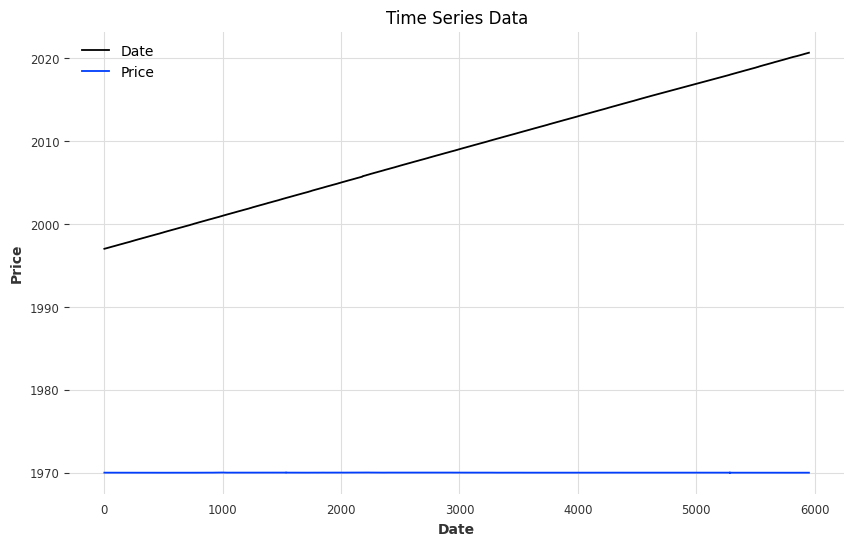

In [36]:
df.plot(figsize=(10, 6), title='Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [31]:
# !pip install darts
# !pip install statsmodels

In [32]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [39]:
#Stationarity: Augmented Dickey-Fuller test
df=df.fillna(df.mean()) # fill the nans with the mean of the dataframe
result = adfuller(df['Price']) # Augmented Dickey Fuller Test

<ipython-input-39-db6804d86f4c>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df=df.fillna(df.mean())


In [40]:
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
# The series is stationary as p-value is less than 0.5

ADF Statistic: -2.944563626227583
p-value: 0.040405870570332


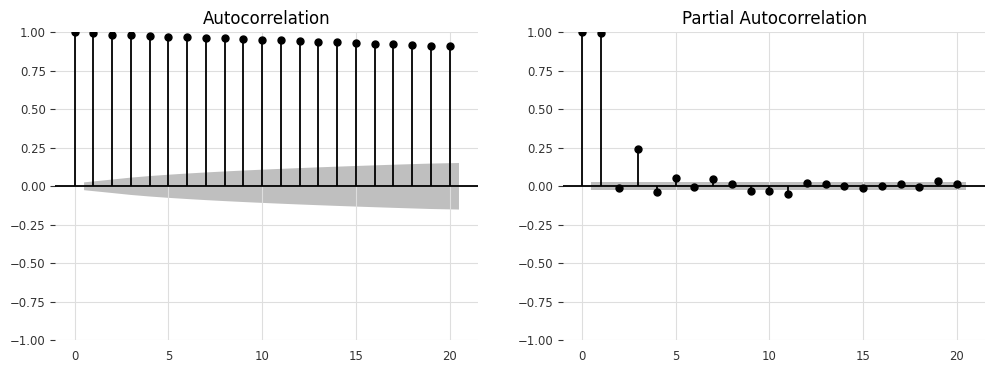

In [44]:
# Arima plot
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(12,4))
plot_acf(df['Price'], lags=20, ax=ax1)
plot_pacf(df['Price'], lags=20, ax=ax2)
plt.show()

In [48]:
# Fitting The arima model

model = ARIMA(df['Price'], order=(1,1,1))
results=model.fit()

In [49]:
# Forecasting the future values
forecast_value=5 # it would be equal to the 5 time points or forecast would be collected after 5 days
forecast= results.get_forecast(steps=forecast_value)

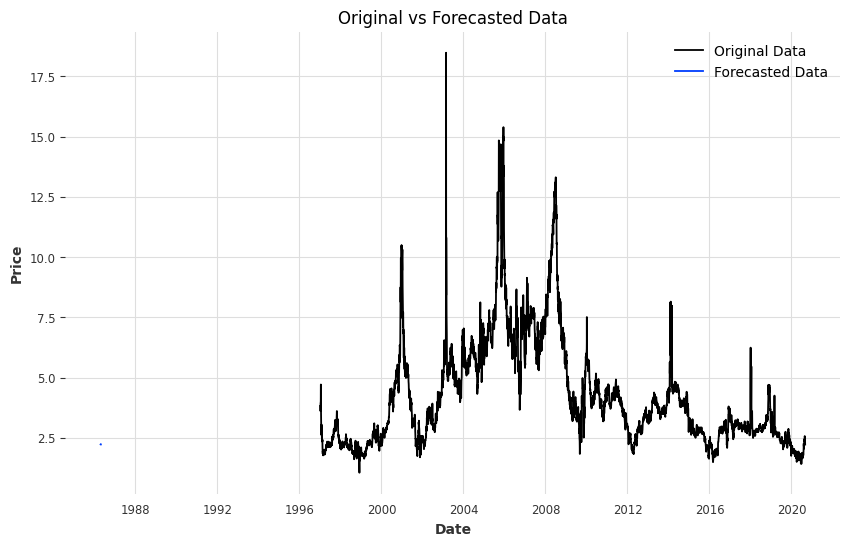

In [53]:
# Plotting the Original vs forecasted value

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Original Data')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original vs Forecasted Data')
plt.legend()
plt.show()